# Image Classification using NASNetLarge

This Code Template is for Image Classification task using NASNetLarge. NASNet-Large is a convolutional neural network that is trained on more than a million images from the ImageNet database

### Required Packages

In [1]:
import os
import numpy as np
from glob import glob
import itertools
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

# TensorFlow Modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualizations
import matplotlib.pyplot as plt
import cv2
import random
import seaborn as sns

### Initialization
Path of the main folder containing train and test folders

In [2]:
base_dir = os.path.join('')

Path of the train and test folders containing image files

In [3]:
train_dir = os.path.join(base_dir, 'train') #train
test_dir = os.path.join(base_dir, 'test') #test

List of target categories which are required for model training and predictions.

In [4]:
target = []

### Data Fetching

The OS module in Python provides functions for interacting with the operating system. This module provides a portable way of using operating system-dependent functionality.

OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

We will use the <Code>os.path</Code> module to interact with the file system and the <Code>cv2.imread()</Code> method to load an image from the specified file path.

### Directory Structure
<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>Master Directory</b>
 |__<b>train</b>
    |______ <b>Class 1</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>Class 2</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>Class 3</b>: [1.jpg, 2.jpg, 3.jpg ....]
    :
    :
 |__<b>test</b>
    |______ <b>Class 1</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>Class 2</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>Class 3</b>: [1.jpg, 2.jpg, 3.jpg ....]
    :
    :
</pre>

In [5]:
# useful for getting number of files
train_image_files = glob(train_dir + '/*/*.jp*g')
test_image_files = glob(test_dir + '/*/*.jp*g')

In [6]:
# Loading the image dataset and plotting some images from all target categories
def plot_image(data, target):
  count = 0
  for category in target:
      path=os.path.join(data, category)
      flg = 0
      ar = []
      # storing image paths in an array
      for img in os.listdir(path):
          ar.append(os.path.join(path,img)) 
          flg+= 1
          if flg==2:
            break
      # plotting the images in dataset
      plt.figure(figsize=(5,5))
      for i in range(2):
        d1 = ar[i]
        img_array = cv2.imread(d1,cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(1,2,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
      count+= 1
      if count == len(target):
        break

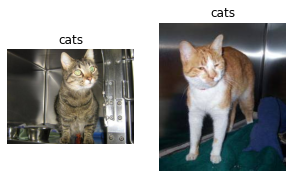

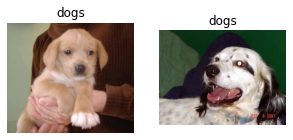

In [7]:
plot_image(train_dir,target)

### Data Preprocessing

An Image occupies a significant portion of space. Since images represent huge datasets, loading them at once to memory (RAM) can lead to severe scalibility issues and memory limitations. Therefore, in practice, images are loaded directly from the directory structure.   

TensorFlow 2 comes with a handy class called <Code>ImageDataGenerator</Code> that augments images. It takes the following parameters:


1. **rotation_range**:	Int. 
>Degree range for random rotations.

2. **width_shift_range**: Float, 1-D array-like or int
          * float: fraction of total width, if < 1, or pixels if >= 1.
          * 1-D array-like: random elements from the array.
          * int: integer number of pixels from interval (-width_shift_range, +width_shift_range)
          * With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).

3. **height_shift_range**:	Float, 1-D array-like or int. 
>Values have similar meaning as width_shift_range

4. **zoom_range**:	Float or [lower, upper]. 
>Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
channel_shift_range	Float. Range for random channel shifts.

5. **horizontal_flip**:	Boolean. 
>Randomly flip inputs horizontally.


6. **rescale**:	rescaling factor. Defaults to None. 
>If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

7. **data_format**	Image data format, either "channels_first" or "channels_last". 
>"channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). 


For more information, refer to the [API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#args)

In [8]:
train_datagenerator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=20,
                                         width_shift_range=.15,
                                         height_shift_range=.15,
                                         horizontal_flip=True,
                                         zoom_range=0.2,
                                         data_format = "channels_last")

test_datagenerator = ImageDataGenerator(rescale = 1./255) #No need for augmentation for test dataset

### Flow From Directory

<Code>ImageDataGenerator</Code> class uses the method <Code>flow_from_directory</Code> to load the images. However, for this method to work, it is necessary the directory follow the above directory structure.

<Code>flow_from_directory</Code> takes the path to a directory & generates batches of augmented data. It takes following parameters:

1. **directory**:	string, path to the target directory. 
>It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. 

2. **target_size**:	Tuple of integers (height, width), defaults to (256,256). 
>The dimensions to which all images found will be resized.
color_mode	One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

3. **classes**:	Default: None. 
>Optional list of class subdirectories (e.g. ['dogs', 'cats']). 

4. **class_mode**:	Default: "categorical". 
>One of "categorical", "binary", "sparse", "input", or None. 

5. **batch_size**:	Default: 32
>Size of the batches of data.

6. **shuffle**: Default: True
>Whether to shuffle the data. If set to False, sorts the data in alphanumeric order.

For more information, refer to the [API](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [9]:
batch_size = 64 # number of images to process at a time 
IMG_SHAPE = 331 # convert all images to be 331 x 331

train_data = train_datagenerator.flow_from_directory(directory = train_dir,
                                                     batch_size = batch_size,
                                                     target_size = (IMG_SHAPE, IMG_SHAPE),
                                                     shuffle = True, #for training only
                                                     class_mode = 'sparse', #type of problem (sparse, binary, or categorical, etc.)
                                                     classes = target)  

test_data = test_datagenerator.flow_from_directory(directory = test_dir,
                                                   batch_size = batch_size,
                                                   target_size = (IMG_SHAPE, IMG_SHAPE),
                                                   shuffle = False,
                                                   class_mode = 'sparse',
                                                   classes = target)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model

In deep learning, each problem is unique in some sense which makes it hard to reuse an already trained model as such in new problems. Transfer Learning is the approach of making use of an already trained model for a related task. 

The already trained model that is to be used via Transfer Learning is called a pre-trained model. A pre-trained model can be state-of-the-art in the domain. But it is necessary that our problem should belong to the same domain as that of the pre-trained model. 

For more information, refer to this [article](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751).

**NASNet-Large** is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 331-by-331. 

### Model Tuning Parameters
    
1. **input_shape**:	 
>Optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (331, 331, 3) for NASNetLarge. It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (224, 224, 3) would be one valid value.

2. **include_top**:	
>Whether to include the fully-connected layer at the top of the network.

3. **weights**:	
>None (random initialization) or imagenet (ImageNet weights) For loading imagenet weights, input_shape should be (331, 331, 3)

4. **input_tensor**:	
>Optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.

5. **pooling**:	
>Optional pooling mode for feature extraction when include_top is False.

6. **classes**:	
>Optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.

For more information on NASNetLarge [click here](https://www.tensorflow.org/api_docs/python/tf/keras/applications/nasnet/NASNetLarge)

In [10]:
# Defining the convolution neural network part in the architecture i.e. base
base = tf.keras.applications.NASNetLarge(input_shape=(331,331,3),
                                       include_top=False,
                                       weights='imagenet') 

In [11]:
# Since we use the pre-trained model’s base and its weights as such. Hence we should not train them again. 
base.trainable=False

In [12]:
 # Developing the the artificial neural network part i.e. head for classification
 head = keras.models.Sequential([
                                 keras.layers.GlobalAveragePooling2D(),
                                 keras.layers.Dense(512, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(4, activation='softmax')
 ]) 

In [13]:
model = keras.models.Sequential([base,head])

In [14]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy']) 
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
sequential (Sequential)      (None, 4)                 2066948   
Total params: 86,983,766
Trainable params: 2,066,948
Non-trainable params: 84,916,818
_________________________________________________________________


In [15]:
# Fit the model
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
32/32 [==============================] - 226s 6s/step - loss: 0.1081 - accuracy: 0.9520 - val_loss: 0.0086 - val_accuracy: 0.9970
Epoch 2/10
32/32 [==============================] - 192s 6s/step - loss: 0.0318 - accuracy: 0.9915 - val_loss: 0.0220 - val_accuracy: 0.9940
Epoch 3/10
32/32 [==============================] - 191s 6s/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0122 - val_accuracy: 0.9970
Epoch 4/10
32/32 [==============================] - 191s 6s/step - loss: 0.0258 - accuracy: 0.9930 - val_loss: 0.0178 - val_accuracy: 0.9950
Epoch 5/10
32/32 [==============================] - 192s 6s/step - loss: 0.0096 - accuracy: 0.9965 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 6/10
32/32 [==============================] - 192s 6s/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0182 - val_accuracy: 0.9960
Epoch 7/10
32/32 [==============================] - 192s 6s/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0309 - val_accuracy: 0.9970
Epoch 8/10
32

### Plot Curves

Plot loss and accuracy metrics to see how the model trains

In [16]:
def plot_model(model_name_history, metric_name):
    # Plot loss per iteration
    fig, ax = plt.subplots(1, 2,figsize=(15,5))

    ax[0].plot(model_name_history.history['loss'], label='loss')
    ax[0].plot(model_name_history.history['val_loss'], label='val_loss')
    ax[0].legend()
    
    # Plot accuracy per iteration
    ax[1].plot(model_name_history.history[metric_name], label='accuracy')
    ax[1].plot(model_name_history.history[f"val_{metric_name}"], label='val_accuracy')
    ax[1].legend()

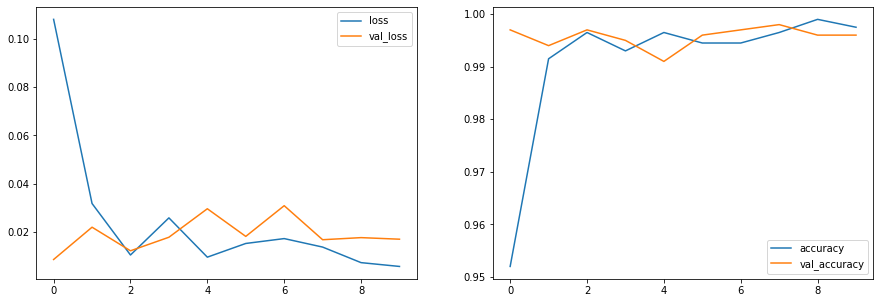

In [17]:
plot_model(history, 'accuracy')

### Model Evaluation (Accuracy)

In [18]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions,axis = 1)
y_test = test_data.classes
class_labels = list(test_data.class_indices.keys())   
loss, accuracy = model.evaluate(test_data)
print("Loss: ", loss)
print("Accuracy Score: ",accuracy)

16/16 [==============================] - 63s 4s/step - loss: 0.0170 - accuracy: 0.9960
Loss:  0.017014851793646812
Accuracy Score:  0.9959999918937683


### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

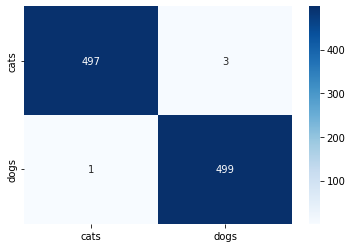

In [19]:
y_pred = np.argmax(predictions,axis = 1)
y_test = test_data.classes
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot = True,
            fmt = 'd',
            xticklabels=class_labels,
            yticklabels= class_labels,
            cmap = plt.cm.Blues)
plt.show()

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [20]:
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

        cats       1.00      0.99      1.00       500
        dogs       0.99      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



#### Creator: Saharsh Laud, Github: [Profile](https://github.com/SaharshLaud)